# ML classification model Tutorial

This notebook demonstrates a complete binary classification workflow using **scikit-learn**.  
We’ll cover:
1. Loading and exploring a dataset  
2. Simple exploratory data analysis 
3. Feature selection  
4. Fitting tree-based models (Decision Tree, Random Forest)  
5. Hyperparameter tuning with Grid Search  
6. Evaluating performance and visualizing results  

---

## Libraries Used

We’ll use Python’s main machine learning ecosystem:

| Library | Purpose | Documentation |
|----------|----------|----------------|
| `pandas` | Data manipulation and EDA | [pandas.pydata.org](https://pandas.pydata.org/) |
| `numpy` | Numerical computing | [numpy.org](https://numpy.org/) |
| `matplotlib`, `seaborn` | Visualization | [matplotlib.org](https://matplotlib.org/), [seaborn.pydata.org](https://seaborn.pydata.org/) |
| `scikit-learn` | Machine learning models, preprocessing, feature selection, model evaluation | [scikit-learn.org/stable](https://scikit-learn.org/stable) |

---

## Dataset: Breast Cancer Wisconsin

We’ll use the `breast_cancer` dataset from `sklearn.datasets`.  
It contains **30 numeric features** computed from digitized images of breast masses.  
The target is **binary**:  
- `0` = malignant (cancerous)  
- `1` = benign (non-cancerous)

Reference: [Breast Cancer Wisconsin (Diagnostic) dataset — scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset)

# 1. Load the dataset

We’ll load the dataset into a pandas DataFrame and perform simple EDA to understand its structure.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print("✅ Dataset loaded successfully")
print(df.shape)
df.head()

✅ Dataset loaded successfully
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2. Simple Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


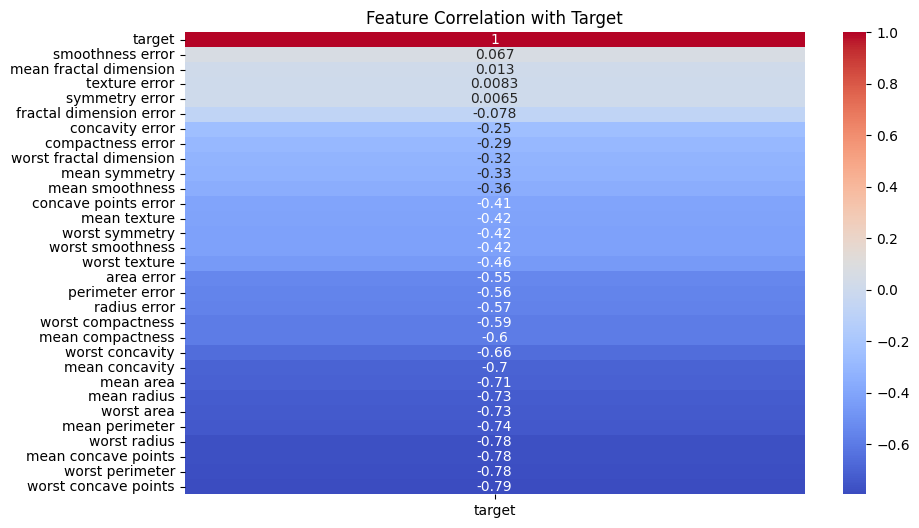

In [2]:
# Basic info
print(df.info())

# Target distribution
print(df["target"].value_counts(normalize=True))

# Descriptive stats
display(df.describe().T)

# Quick correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)["target"].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()

> Observation:  
> - All features are numeric, so we won’t need one-hot encoding.  
> - No missing values in this dataset, but we’ll include imputation steps for demonstration.  
> - The target is more or less balanced

# 3. Split Train/Test and Baseline Model (POC)

We’ll split the dataset into 80% training and 20% testing sets.

=== Baseline Decision Tree ===
Train Metrics:
ROC AUC:   1.0000
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000
Confusion matrix (train):
 [[148   0]
 [  0 250]]

Test Metrics:
ROC AUC:   0.9126
Accuracy:  0.9181
Precision: 0.9346
Recall:    0.9346
F1-score:  0.9346
Confusion matrix (test):
 [[ 57   7]
 [  7 100]]


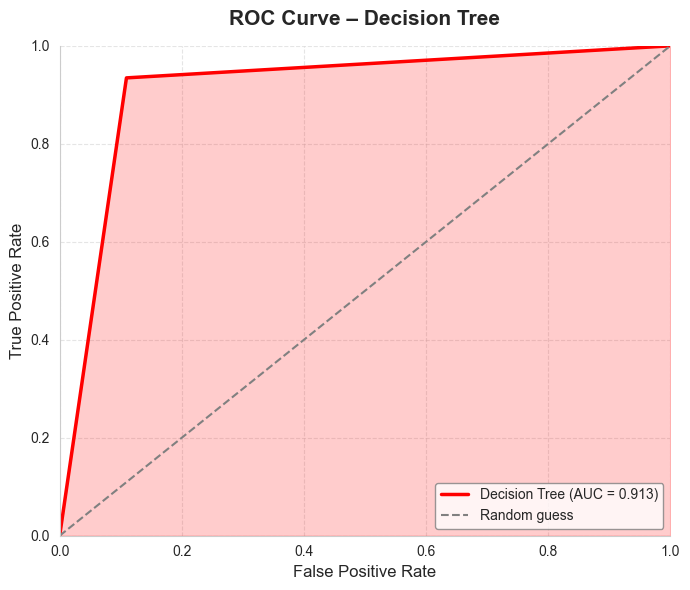

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, RocCurveDisplay, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# ======================================================
# Split data
# ======================================================
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# ======================================================
# Train baseline Decision Tree
# ======================================================
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# ======================================================
# Predictions for train and test
# ======================================================
y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

# ======================================================
# Compute metrics (Train)
# ======================================================
roc_auc_train = roc_auc_score(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# ======================================================
# Compute metrics (Test)
# ======================================================
roc_auc_test = roc_auc_score(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# ======================================================
# Print results
# ======================================================
print("=== Baseline Decision Tree ===")
print("Train Metrics:")
print(f"ROC AUC:   {roc_auc_train:.4f}")
print(f"Accuracy:  {acc_train:.4f}")
print(f"Precision: {prec_train:.4f}")
print(f"Recall:    {rec_train:.4f}")
print(f"F1-score:  {f1_train:.4f}")
print("Confusion matrix (train):\n", confusion_matrix(y_train, y_pred_train))

print("\nTest Metrics:")
print(f"ROC AUC:   {roc_auc_test:.4f}")
print(f"Accuracy:  {acc_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall:    {rec_test:.4f}")
print(f"F1-score:  {f1_test:.4f}")
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_pred_test))

# ======================================================
# ROC curve (test)
# ======================================================
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test)

plt.plot(fpr, tpr, color='red', lw=2.5, label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.fill_between(fpr, tpr, alpha=0.2, color='red')

# Reference line
plt.plot([0, 1], [0, 1], linestyle="--", lw=1.5, color="gray", label="Random guess")

plt.title(f"ROC Curve – Decision Tree", fontsize=15, weight="bold", pad=15)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", frameon=True, facecolor="white", edgecolor="gray")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


# 4. Feature Selection — Forward Selection with Random Forest

Feature selection helps identify the most informative variables.  
We’ll use a **Sequential Feature Selector (SFS)** with cross-validation, evaluating different numbers of features based on ROC-AUC.

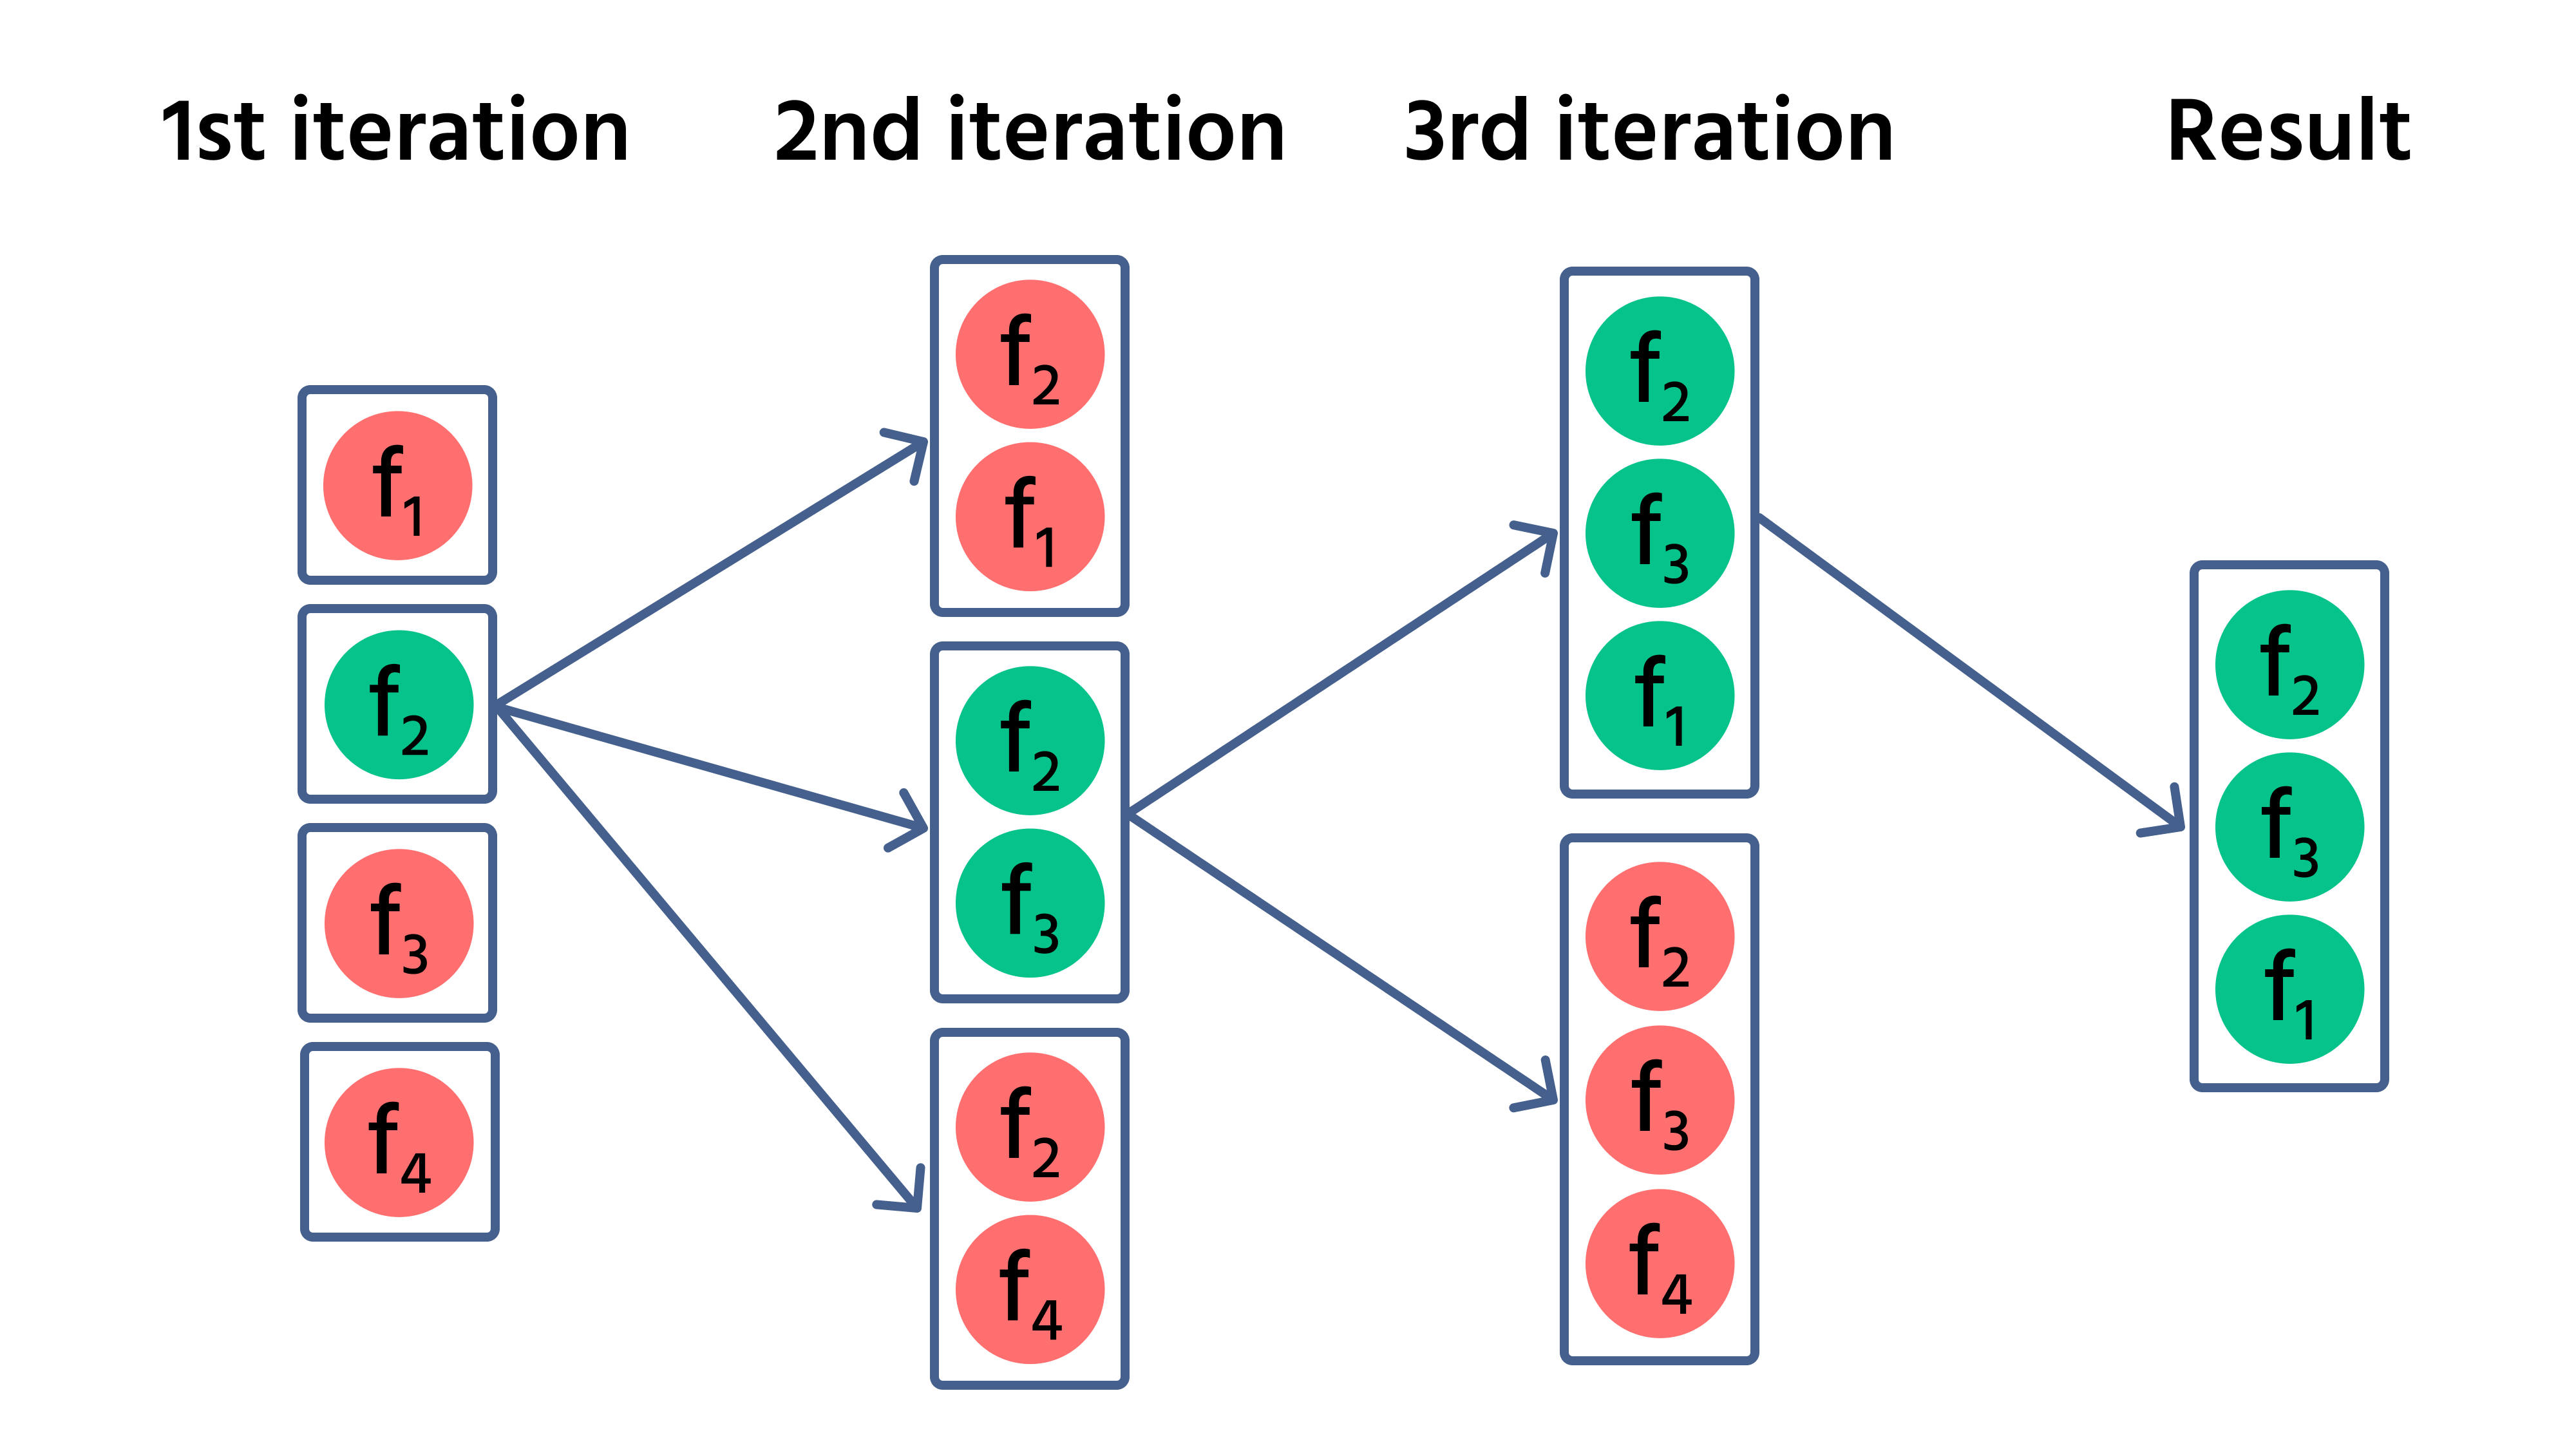

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import time

rf_base = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

results = []

print("Evaluating Sequential Feature Selection...\n")

sfs = SequentialFeatureSelector(
    rf_base,
    n_features_to_select='auto',
    direction="forward",
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

sfs.fit(X_train, y_train)

# Selected features
selected_feats = list(X_train.columns[sfs.get_support()])

# Fit RandomForest with selected features
rf_base.fit(X_train[selected_feats], y_train)
y_pred_prob = rf_base.predict_proba(X_test[selected_feats])[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

Evaluating Sequential Feature Selection...



In [5]:
selected_feats

['mean smoothness',
 'mean symmetry',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst perimeter',
 'worst smoothness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
print(f'ROC AUC with selected features: {roc_auc:.4f}')

ROC AUC with selected features: 0.9932


# 5. Hyperparameter Tuning with Grid Search (ROC AUC Scoring)

We’ll tune:
- `criterion`: split quality function
- `max_depth`: depth of trees
- `min_sample_split` : minimum required amount of instances to divide a node
- `n_estimators`: number of trees

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    rf,
    param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train[selected_feats], y_train)

print("✅ Best parameters found:", grid_search.best_params_)
print(f"Best ROC AUC (CV): {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC (CV): 0.9938


# 6. Evaluate the Tuned Model on Test Data

=== Tuned Random Forest ===
ROC AUC:   0.9932
Accuracy:  0.9591
Precision: 0.9545
Recall:    0.9813
F1-score:  0.9677
Confusion matrix:
 [[ 59   5]
 [  2 105]]


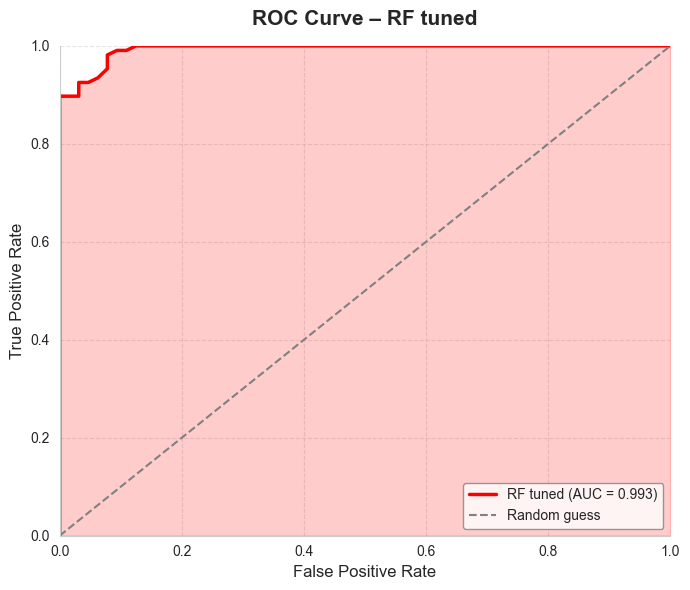

In [8]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test[selected_feats])
y_prob_best = best_rf.predict_proba(X_test[selected_feats])[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_prob_best)
acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("=== Tuned Random Forest ===")
print(f"ROC AUC:   {roc_auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_best))

# ======================================================
# ROC curve (test)
# ======================================================
sns.set_style("whitegrid")
plt.figure(figsize=(7, 6))

fpr, tpr, _ = roc_curve(y_test, y_prob_best)
auc_score = roc_auc_score(y_test, y_prob_best)

plt.plot(fpr, tpr, color='red', lw=2.5, label=f"RF tuned (AUC = {auc_score:.3f})")
plt.fill_between(fpr, tpr, alpha=0.2, color='red')

# Reference line
plt.plot([0, 1], [0, 1], linestyle="--", lw=1.5, color="gray", label="Random guess")

plt.title(f"ROC Curve – RF tuned", fontsize=15, weight="bold", pad=15)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", frameon=True, facecolor="white", edgecolor="gray")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


# 7. Feature Importances

In [9]:
importances = best_rf.feature_importances_
feature_names = X_train[selected_feats].columns

# Create a DataFrame sorted by importance
feat_imp_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

C:\Users\feste\AppData\Local\Temp\ipykernel_1756\1306702066.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


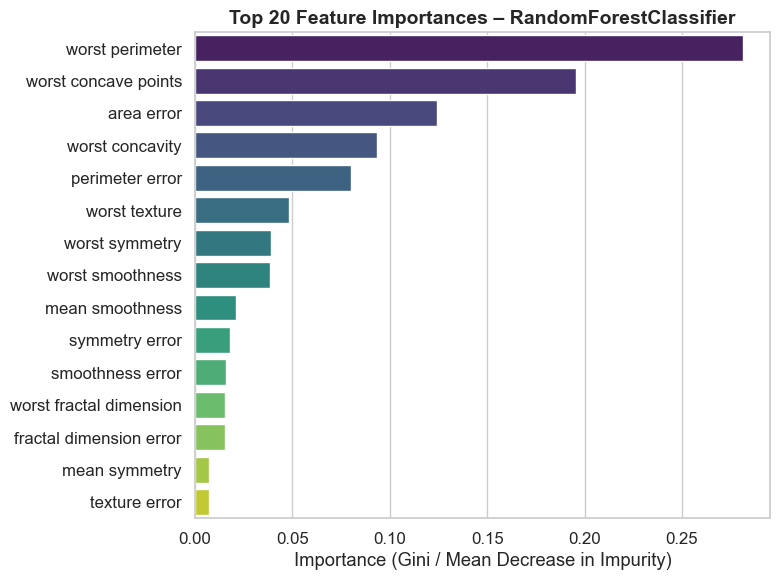

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.1)

top_n = 20  # show top N features

plt.figure(figsize=(8, 6))
sns.barplot(
    data=feat_imp_df.head(top_n),
    y="Feature",
    x="Importance",
    palette="viridis"
)
plt.title(f"Top {top_n} Feature Importances – {type(best_rf).__name__}", fontsize=14, weight="bold")
plt.xlabel("Importance (Gini / Mean Decrease in Impurity)")
plt.ylabel("")
plt.tight_layout()
plt.show()

## 🔗 References
- [scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)  
- [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)  
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)